In [51]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

CIFAR_ROOT = "../data/cifar-10-batches-py"


In [52]:
def load_cifar_batch(path: str):
    with open(path, "rb") as f:
        batch = pickle.load(f, encoding="latin1")

    data = batch["data"]
    labels = np.array(batch["labels"])

    return data, labels

def load_cifar10(root: str):
    xs, ys = [], []

    for i in range(1, 6):
        batch_path = os.path.join(root, f"data_batch_{i}")
        x, y = load_cifar_batch(batch_path)
        xs.append(x)
        ys.append(y)

    x_train = np.concatenate(xs, axis=0)
    y_train = np.concatenate(ys, axis=0)

    x_test, y_test = load_cifar_batch(os.path.join(root, "test_batch"))

    return x_train, y_train, x_test, y_test


x_train, y_train, x_test, y_test = load_cifar10(CIFAR_ROOT)

In [53]:
print("Train images:", x_train.shape)
print("Train labels:", y_train.shape)
print("Test images:", x_test.shape)
print("Test labels:", y_test.shape)
print("Dtype:", x_train.dtype)
print("Pixel range:", x_train.min(), "→", x_train.max())

Train images: (50000, 3072)
Train labels: (50000,)
Test images: (10000, 3072)
Test labels: (10000,)
Dtype: uint8
Pixel range: 0 → 255


In [54]:
with open(os.path.join(CIFAR_ROOT, "batches.meta"), "rb") as f:
    meta = pickle.load(f, encoding="latin1")

label_names = meta["label_names"]
print("Classes:", label_names)

Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [55]:
unique, counts = np.unique(y_train, return_counts=True)

print("Class distribution in train set:")
for idx, cnt in zip(unique, counts):
    print(f"{idx} ({label_names[idx]}): {cnt}")

Class distribution in train set:
0 (airplane): 5000
1 (automobile): 5000
2 (bird): 5000
3 (cat): 5000
4 (deer): 5000
5 (dog): 5000
6 (frog): 5000
7 (horse): 5000
8 (ship): 5000
9 (truck): 5000


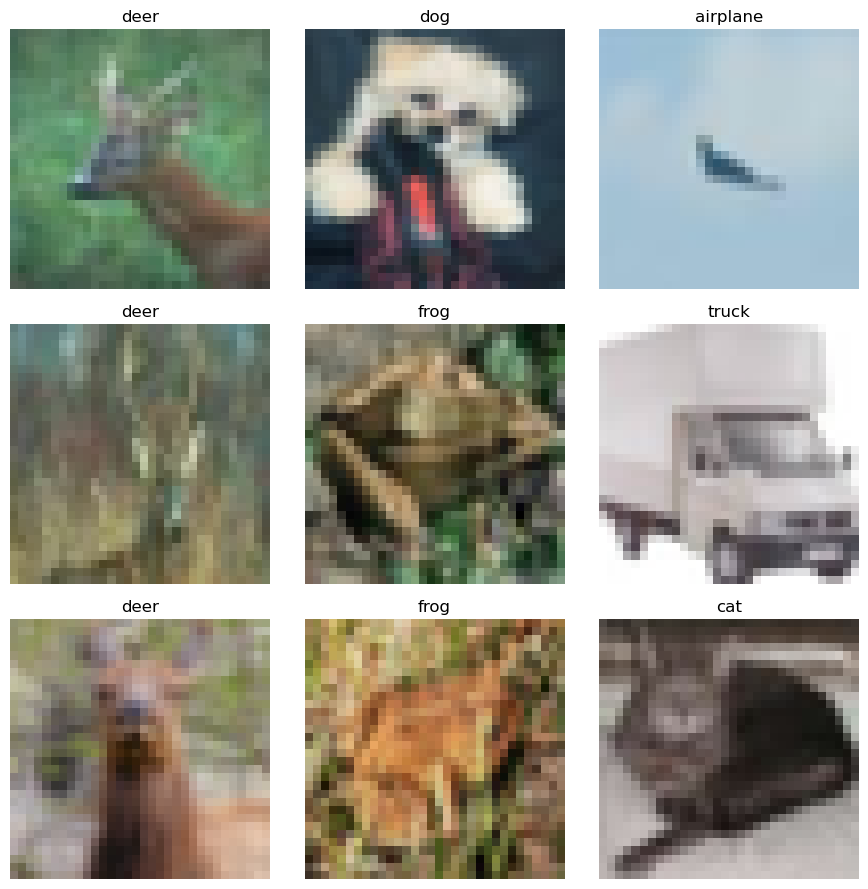

In [56]:
def show_random_images_flat(x, y, class_names, n=9):
    indices = np.random.choice(len(x), size=n, replace=False)
    images = x[indices]
    labels = y[indices]

    cols = 3
    rows = n // cols + int(n % cols != 0)

    plt.figure(figsize=(cols * 3, rows * 3))
    for i, (img_flat, lab) in enumerate(zip(images, labels)):
        img = img_flat.reshape(3, 32, 32).transpose(1, 2, 0)

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(class_names[lab])
        plt.axis("off")

    plt.tight_layout()
    plt.show()

show_random_images_flat(x_train, y_train, label_names, n=9)

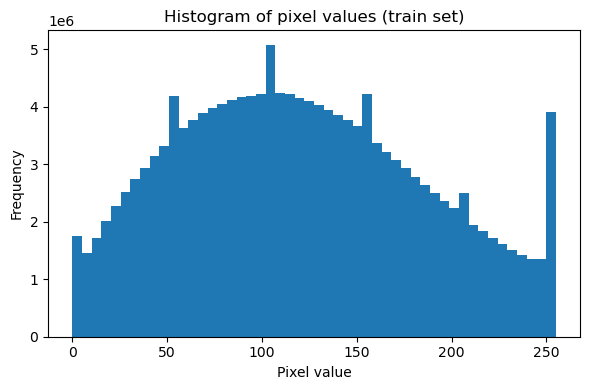

In [57]:

plt.figure(figsize=(6, 4))
plt.hist(x_train.flatten(), bins=50)
plt.title("Histogram of pixel values (train set)")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()